# ***Decision Tree Assignment***



### **1. What is a Decision Tree, and how does it work?**

A **Decision Tree** is a supervised machine learning algorithm used for classification and regression. It works by recursively splitting the dataset into subsets based on feature values to form a tree-like structure of decisions. Each internal node represents a decision (based on a feature), each branch represents an outcome of the decision, and each leaf node represents a final output or label.

---

### **2. What are impurity measures in Decision Trees?**

**Impurity measures** quantify how mixed the classes are in a node. The goal is to split data in a way that reduces impurity as much as possible. Common impurity measures:

* **Gini Impurity**
* **Entropy (used in Information Gain)**
* **Variance (used in regression trees)**

---

### **3. What is the mathematical formula for Gini Impurity?**

$$
\text{Gini}(D) = 1 - \sum_{i=1}^k p_i^2
$$

Where:

* $p_i$ = probability of class $i$ in dataset $D$
* $k$ = number of classes

---

### **4. What is the mathematical formula for Entropy?**

$$
\text{Entropy}(D) = - \sum_{i=1}^k p_i \log_2(p_i)
$$

Where:

* $p_i$ = probability of class $i$ in dataset $D$
* $k$ = number of classes

---

### **5. What is Information Gain, and how is it used in Decision Trees?**

**Information Gain (IG)** measures the reduction in entropy or impurity after a dataset is split on a feature.

$$
IG(D, A) = Entropy(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} \cdot Entropy(D_v)
$$

Where:

* $A$ = feature
* $D_v$ = subset of $D$ where feature $A$ has value $v$

Used to **choose the best feature** to split the node.

---

### **6. What is the difference between Gini Impurity and Entropy?**

| Feature  | Gini Impurity                                  | Entropy                          |
| -------- | ---------------------------------------------- | -------------------------------- |
| Formula  | $1 - \sum p_i^2$                               | $- \sum p_i \log_2(p_i)$         |
| Range    | \[0, 0.5] for binary classes                   | \[0, 1] for binary classes       |
| Bias     | Tends to isolate the most frequent class early | Sensitive to class distribution  |
| Speed    | Faster (no logarithms)                         | Slower (logarithmic calculation) |
| Use Case | CART algorithm                                 | ID3, C4.5 algorithms             |

---

### **7. What is the mathematical explanation behind Decision Trees?**

At each node:

* Evaluate all features and possible split points.
* Calculate the impurity (Gini or Entropy) for each.
* Select the split that gives the **maximum Information Gain** (or minimum Gini).
* Recursively split the dataset until a stopping criterion is met (pure nodes, depth limit, min samples).

---

### **8. What is Pre-Pruning in Decision Trees?**

**Pre-Pruning** stops tree growth early by using conditions like:

* Maximum tree depth
* Minimum samples required to split a node
* Minimum impurity decrease

It helps to **prevent overfitting** by limiting complexity.

---

### **9. What is Post-Pruning in Decision Trees?**

**Post-Pruning** builds a full tree first, then **removes nodes** that don't significantly improve accuracy (based on a validation set or cost-complexity).
It **simplifies the tree** and improves generalization.

---

### **10. What is the difference between Pre-Pruning and Post-Pruning?**

| Feature      | Pre-Pruning                    | Post-Pruning                          |
| ------------ | ------------------------------ | ------------------------------------- |
| When applied | During tree construction       | After full tree is built              |
| Control      | Proactively limits depth/size  | Reactively trims unnecessary branches |
| Risk         | May underfit if too aggressive | More flexible, avoids overfitting     |

---

### **11. What is a Decision Tree Regressor?**

A **Decision Tree Regressor** predicts **continuous values** rather than classes.
Instead of using impurity (like Gini or Entropy), it minimizes **mean squared error (MSE)** or **mean absolute error (MAE)** in the leaves.

---

### **12. What are the advantages and disadvantages of Decision Trees?**

**Advantages:**

* Easy to understand and interpret
* Handles both numerical and categorical data
* No need for feature scaling
* Can capture non-linear patterns

**Disadvantages:**

* Prone to overfitting (without pruning)
* Unstable with small data changes
* Can be biased with imbalanced datasets

---

### **13. How does a Decision Tree handle missing values?**

Methods include:

* **Surrogate Splits**: Use other features that give similar splits
* **Imputation**: Fill missing values before training
* **Ignore**: Exclude samples with missing values (less common)

---

### **14. How does a Decision Tree handle categorical features?**

* Categorical features are split by evaluating all possible **groupings of categories** (or one-hot encoding in some implementations).
* For example, a split could be:
  "Is color in {Red, Blue}?" vs. "Color = Green"

---

### **15. What are some real-world applications of Decision Trees?**

* **Medical diagnosis** (e.g., disease classification)
* **Customer churn prediction**
* **Loan approval systems**
* **Fraud detection**
* **Marketing segmentation**
* **Spam email classification**
* **Stock market prediction (regression trees)**




In [1]:
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9555555555555556


In [2]:
#17.Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Feature importances: {clf.feature_importances_}")


Accuracy: 0.9555555555555556
Feature importances: [0.02146947 0.02146947 0.57196476 0.38509631]


In [3]:
#18.Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9555555555555556


In [7]:
#19.Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.48779760994591403


Accuracy: 0.9555555555555556


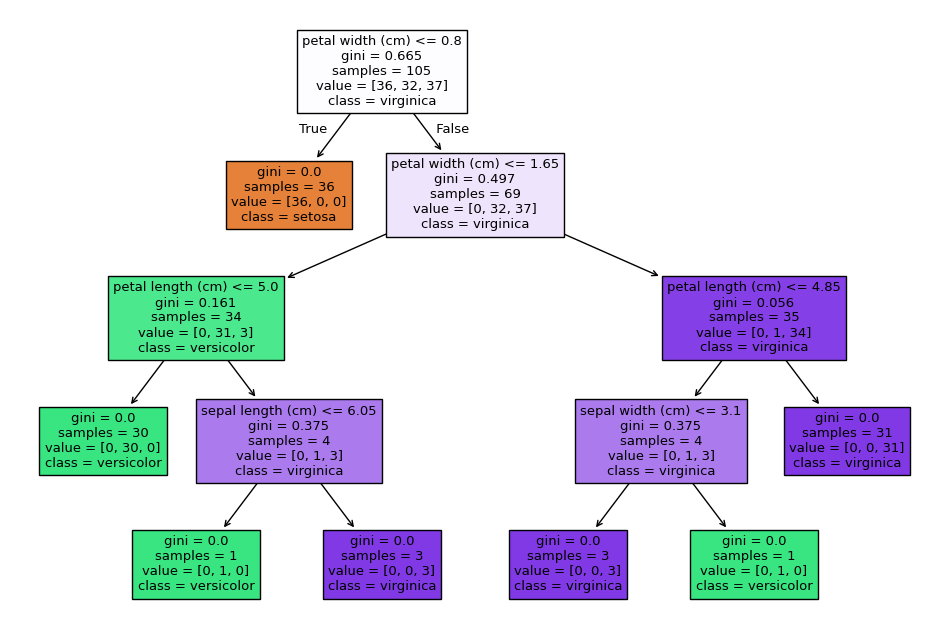

In [9]:
#20.Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


In [11]:
#21.Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max_depth=3: {accuracy}")
compare = DecisionTreeClassifier()
compare.fit(X_train, y_train)
y_pred = compare.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with no max_depth: {accuracy}")


Accuracy with max_depth=3: 0.9555555555555556
Accuracy with no max_depth: 0.9555555555555556


In [12]:
#22.Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with min_samples_split=5: {accuracy}")
compare = DecisionTreeClassifier()
compare.fit(X_train, y_train)
y_pred = compare.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with no min_samples_split: {accuracy}")


Accuracy with min_samples_split=5: 0.9555555555555556
Accuracy with no min_samples_split: 0.9555555555555556


In [14]:
#23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

compare = DecisionTreeClassifier()
compare.fit(X_train, y_train)
y_pred = compare.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without feature scaling: {accuracy}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with feature scaling: {accuracy}")



Accuracy without feature scaling: 0.9555555555555556
Accuracy with feature scaling: 0.9555555555555556


In [17]:
#24.Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9555555555555556


Accuracy: 0.9555555555555556
Feature importances: [0.02146947 0.02146947 0.57196476 0.38509631]


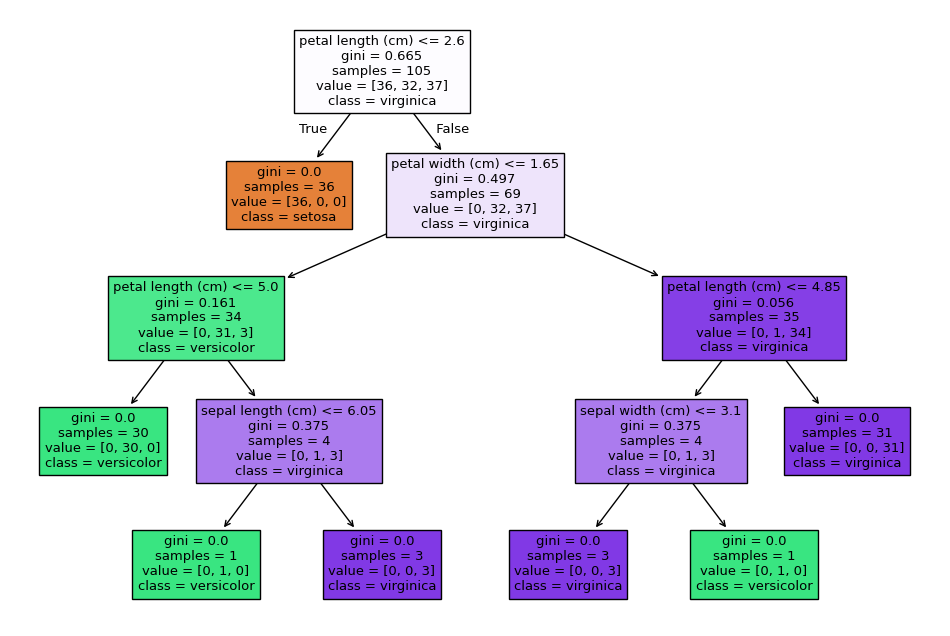

In [20]:
#25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Feature importances: {clf.feature_importances_}")

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


In [25]:
#26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with max_depth=5: {mse}")
compare = DecisionTreeRegressor()
compare.fit(X_train, y_train)
y_pred = compare.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with no max_depth: {mse}")


Mean Squared Error with max_depth=5: 0.49755998972953036
Mean Squared Error with no max_depth: 0.5021416411863371


Accuracy: 0.9555555555555556
Feature importances: [0.02146947 0.02146947 0.57196476 0.38509631]
Accuracy with CCP: 0.9555555555555556


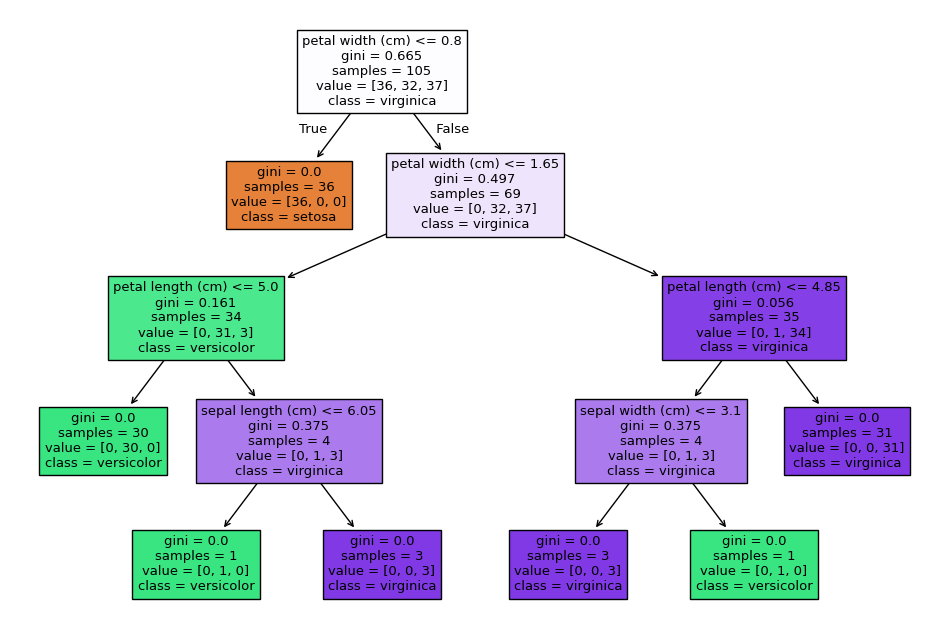

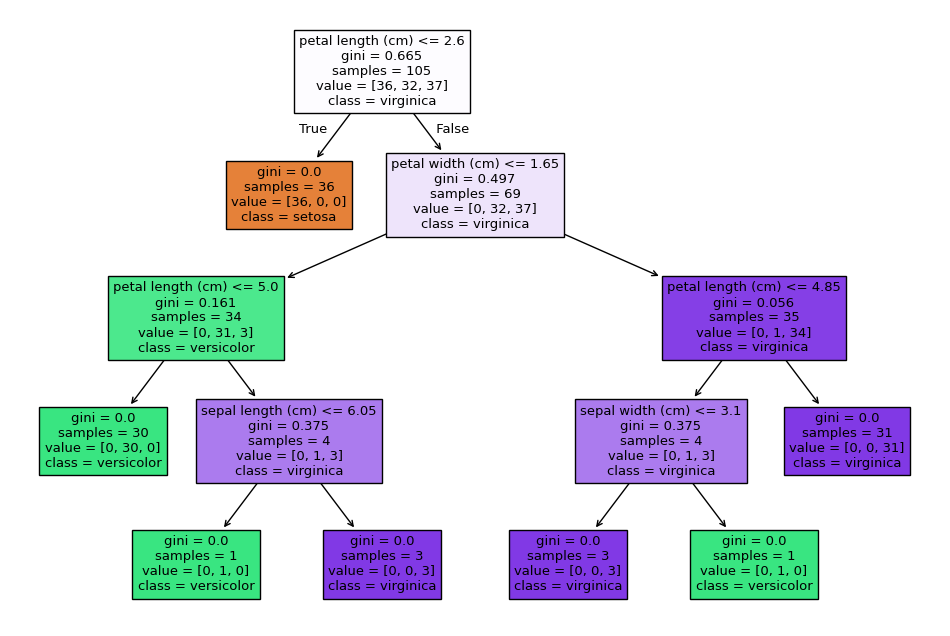

In [22]:
#27.Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Feature importances: {clf.feature_importances_}")

ccp = DecisionTreeClassifier(ccp_alpha=0.001)
ccp.fit(X_train, y_train)
y_pred = ccp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with CCP: {accuracy}")
plt.figure(figsize=(12, 8))
tree.plot_tree(ccp, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [23]:
# 28.Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1-Score: 0.9555555555555556


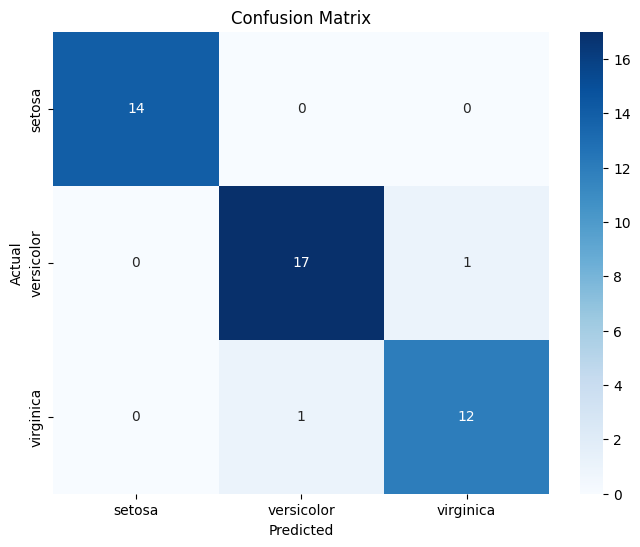

In [26]:
#29.Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Accuracy: 0.9555555555555556


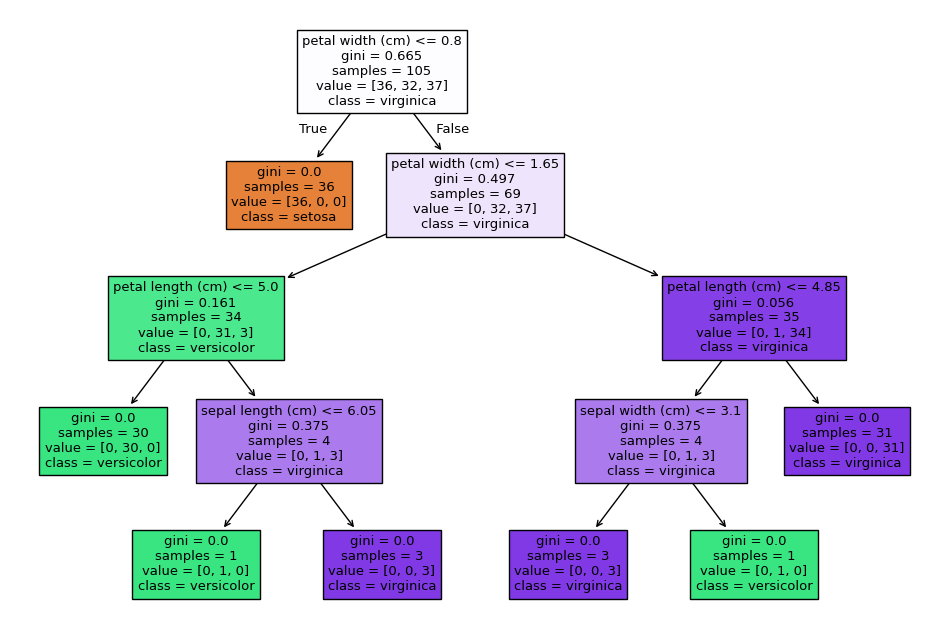

In [27]:
#30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()
